# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


In [7]:
cities

['adamstown',
 'west island',
 'manokwari',
 'edinburgh of the seven seas',
 'port shepstone',
 'kingston',
 'belmonte',
 'wanganui',
 'marion',
 'ushuaia',
 'jamestown',
 'longyearbyen',
 'port-aux-francais',
 'blackmans bay',
 "st. john's",
 'naliya',
 'taiohae',
 'ilulissat',
 'isafjordur',
 'invercargill',
 'thompson',
 'chonchi',
 'bilibino',
 'port alfred',
 'puerto baquerizo moreno',
 'kirakira',
 'hadibu',
 'kargasok',
 'dhuusamarreeb',
 'queenstown',
 'maputo',
 'bethel',
 'kiffa',
 'grytviken',
 'isla vista',
 'ilha de mocambique',
 'danane',
 'caister-on-sea',
 'solwezi',
 'ruidoso',
 'college',
 'newman',
 'bengkulu',
 'moroto',
 'hamilton',
 'hithadhoo',
 'whitehorse',
 'bredasdorp',
 'waitangi',
 'yellowknife',
 'wailua homesteads',
 'puerto natales',
 'newcastle',
 'talnakh',
 'sanctuary point',
 'san julian',
 'castillos',
 'guerrero negro',
 'papatowai',
 'soanierana ivongo',
 'kodiak',
 'puerto ayora',
 'port mathurin',
 'san patricio',
 'linping',
 'badger',
 'klyuch

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | west island
Processing Record 3 of Set 1 | manokwari
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | port shepstone
Processing Record 6 of Set 1 | kingston
Processing Record 7 of Set 1 | belmonte
Processing Record 8 of Set 1 | wanganui
Processing Record 9 of Set 1 | marion
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | st. john's
Processing Record 16 of Set 1 | naliya
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | thompson
Processi

City not found. Skipping...
Processing Record 38 of Set 4 | new norfolk
Processing Record 39 of Set 4 | wynyard
Processing Record 40 of Set 4 | miresu mare
Processing Record 41 of Set 4 | nenjiang
Processing Record 42 of Set 4 | nyurba
Processing Record 43 of Set 4 | wuchuan
Processing Record 44 of Set 4 | nagqu
Processing Record 45 of Set 4 | phalaborwa
Processing Record 46 of Set 4 | pervomays'kyy
Processing Record 47 of Set 4 | opuwo
Processing Record 48 of Set 4 | arawa
Processing Record 49 of Set 4 | chipinge
Processing Record 0 of Set 5 | yangor
City not found. Skipping...
Processing Record 1 of Set 5 | dalbandin
Processing Record 2 of Set 5 | yaren
Processing Record 3 of Set 5 | taloqan
Processing Record 4 of Set 5 | warrnambool
Processing Record 5 of Set 5 | tofol
Processing Record 6 of Set 5 | lensk
Processing Record 7 of Set 5 | mata-utu
Processing Record 8 of Set 5 | saldanha
Processing Record 9 of Set 5 | gadzhiyevo
Processing Record 10 of Set 5 | erdenet
Processing Record 

Processing Record 24 of Set 8 | polessk
Processing Record 25 of Set 8 | walvis bay
Processing Record 26 of Set 8 | yirga 'alem
City not found. Skipping...
Processing Record 27 of Set 8 | inonu
Processing Record 28 of Set 8 | taltal
Processing Record 29 of Set 8 | akrehamn
Processing Record 30 of Set 8 | ballito
Processing Record 31 of Set 8 | ar ruways
Processing Record 32 of Set 8 | pacific grove
Processing Record 33 of Set 8 | mogok
Processing Record 34 of Set 8 | menaka
Processing Record 35 of Set 8 | kruisfontein
Processing Record 36 of Set 8 | luderitz
Processing Record 37 of Set 8 | alo
Processing Record 38 of Set 8 | saudarkrokur
Processing Record 39 of Set 8 | tual
Processing Record 40 of Set 8 | dadukou
Processing Record 41 of Set 8 | tokar
Processing Record 42 of Set 8 | akureyri
Processing Record 43 of Set 8 | geraldton
Processing Record 44 of Set 8 | tionk essil
Processing Record 45 of Set 8 | port hedland
Processing Record 46 of Set 8 | zyryanovsk
Processing Record 47 of S

Processing Record 14 of Set 12 | carutapera
Processing Record 15 of Set 12 | selibaby
Processing Record 16 of Set 12 | floro
Processing Record 17 of Set 12 | villarrica
Processing Record 18 of Set 12 | wajir
Processing Record 19 of Set 12 | harstad
Processing Record 20 of Set 12 | beau vallon
Processing Record 21 of Set 12 | sirte
Processing Record 22 of Set 12 | nuporanga
Processing Record 23 of Set 12 | willowmore
Processing Record 24 of Set 12 | marovoay
Processing Record 25 of Set 12 | wyndham
Processing Record 26 of Set 12 | fort william
Processing Record 27 of Set 12 | kapadvanj
Processing Record 28 of Set 12 | inhambane
Processing Record 29 of Set 12 | puerto deseado
Processing Record 30 of Set 12 | sutherlin
Processing Record 31 of Set 12 | diamante
Processing Record 32 of Set 12 | dudinka
Processing Record 33 of Set 12 | hangu
Processing Record 34 of Set 12 | kamina
Processing Record 35 of Set 12 | ocean shores
Processing Record 36 of Set 12 | westport
Processing Record 37 of 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,24.97,75,0,2.49,PN,1739002892
1,west island,-12.1568,96.8225,29.99,74,75,9.26,CC,1739002894
2,manokwari,-0.8667,134.0833,24.25,93,100,3.01,ID,1739002895
3,edinburgh of the seven seas,-37.0676,-12.3116,15.91,73,100,7.53,SH,1739002896
4,port shepstone,-30.7414,30.4550,25.68,79,91,6.69,ZA,1739002897


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,24.97,75,0,2.49,PN,1739002892
1,west island,-12.1568,96.8225,29.99,74,75,9.26,CC,1739002894
2,manokwari,-0.8667,134.0833,24.25,93,100,3.01,ID,1739002895
3,edinburgh of the seven seas,-37.0676,-12.3116,15.91,73,100,7.53,SH,1739002896
4,port shepstone,-30.7414,30.4550,25.68,79,91,6.69,ZA,1739002897


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

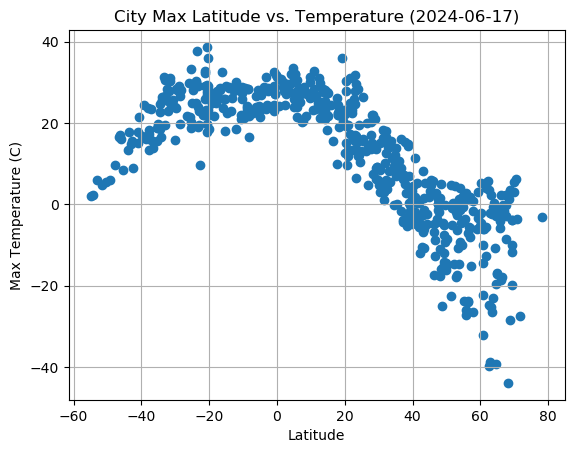

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

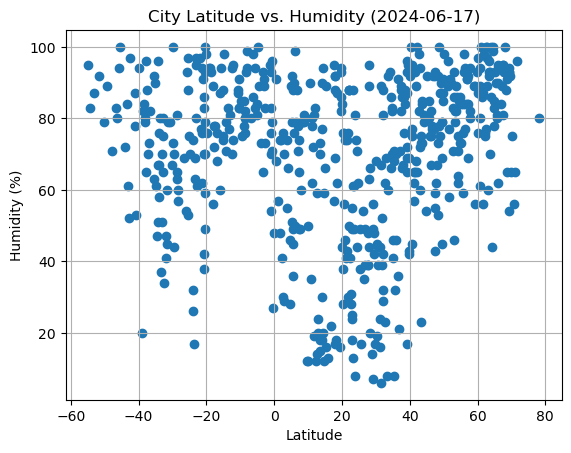

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

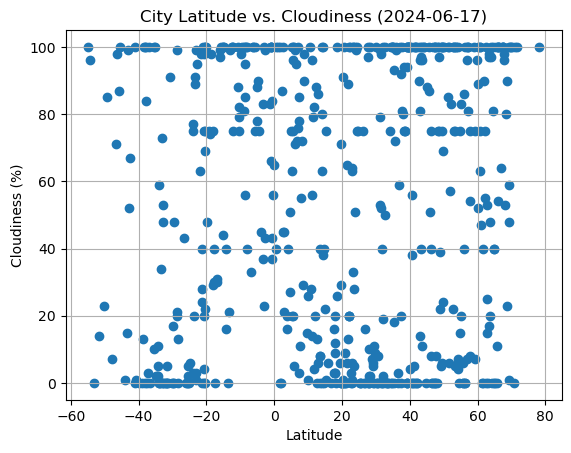

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

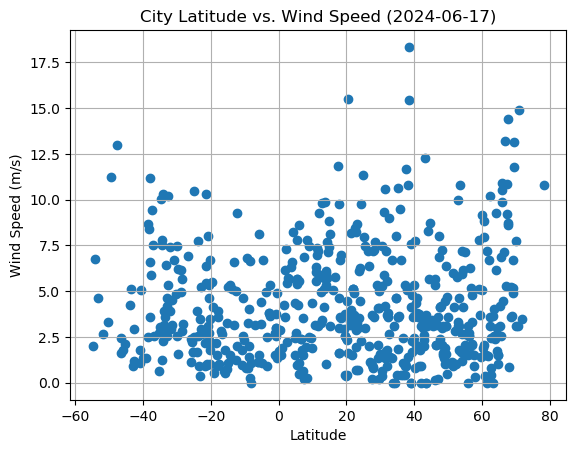

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis, xlabel="", ylabel="", title=""):
    (slope, intercept, rvalue, pvalue, std_err) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    x = max(x_axis) * 0.05
    y = max(y_axis) * 0.95
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis,regress_values,"r-")
    plt.text(x, y, line_eq, color="red", position = (0,0))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    
    plt.show()

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,kingston,17.9970,-76.7936,24.53,69,20,3.60,JM,1739002652
8,marion,39.7684,-86.1555,1.27,69,100,3.60,US,1739002902
10,jamestown,42.0970,-79.2353,-11.91,100,0,0.00,US,1739002782
11,longyearbyen,78.2186,15.6401,-3.09,80,100,10.80,SJ,1739002906
14,st. john's,47.5649,-52.7093,0.08,92,100,4.12,CA,1739002910


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,24.97,75,0,2.49,PN,1739002892
1,west island,-12.1568,96.8225,29.99,74,75,9.26,CC,1739002894
2,manokwari,-0.8667,134.0833,24.25,93,100,3.01,ID,1739002895
3,edinburgh of the seven seas,-37.0676,-12.3116,15.91,73,100,7.53,SH,1739002896
4,port shepstone,-30.7414,30.4550,25.68,79,91,6.69,ZA,1739002897


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7224966214849587


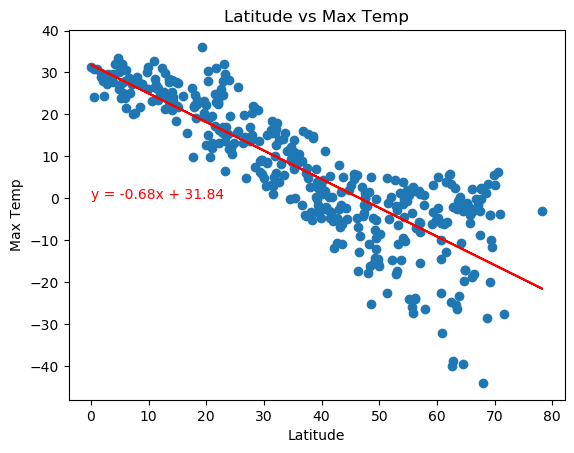

In [42]:
linear_reg(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Latitude vs Max Temp")

The r-squared is: 0.3272825395709855


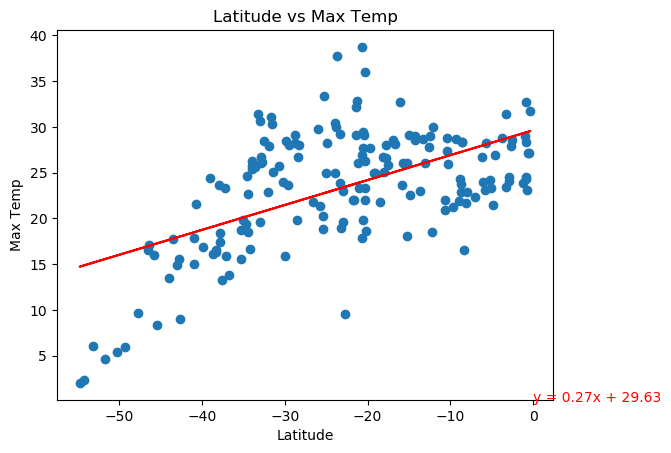

In [43]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Latitude vs Max Temp")

**Discussion about the linear relationship:
In the northern Hemisphere, there is a strong negative correlation between Latitude and Max Temp. This means that as latitude increases, temperature will decrease. 
In the southern hemisphere, there is a weak positive correlation between Latitude and Max Temp. This means that as latitude increases, temperatures will also increase, but at a lower rate.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1892182248807392


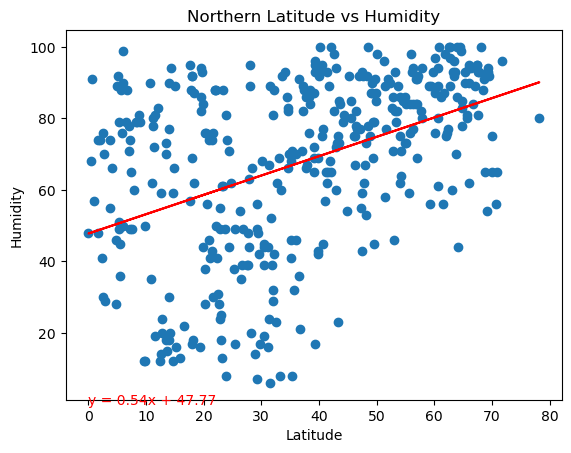

In [44]:
# Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", "Northern Latitude vs Humidity")

The r-squared is: 0.0213016405670995


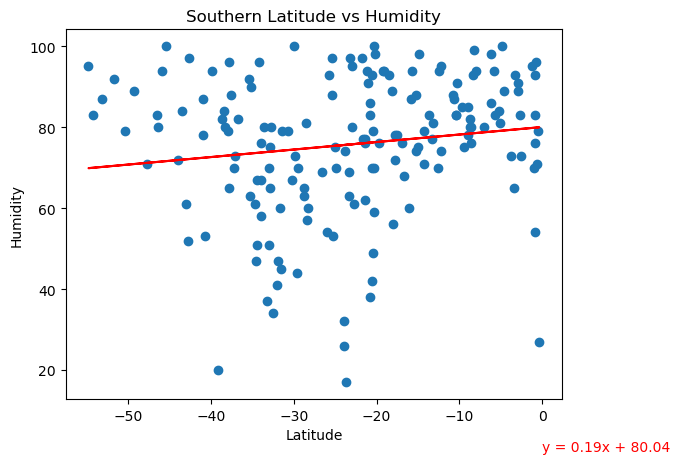

In [45]:
# Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", "Southern Latitude vs Humidity")

**Discussion about the linear relationship:** In the northern Hemisphere, there is a weak positive correlation between Latitude and Humidity. This means that as latitude increases, humidity will increase at a small rate. In the southern hemisphere, there is a weak positive correlation between Latitude and Humidity. This means that as latitude increases, humidity will also increase, but at a lower rate.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.02965681648967307


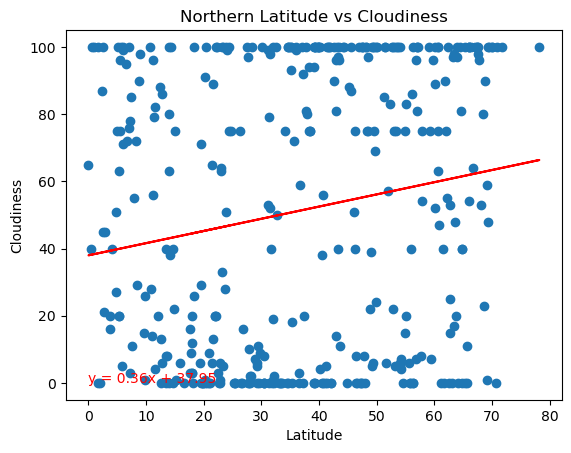

In [46]:
# Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Northern Latitude vs Cloudiness")

The r-squared is: 0.12023175832375108


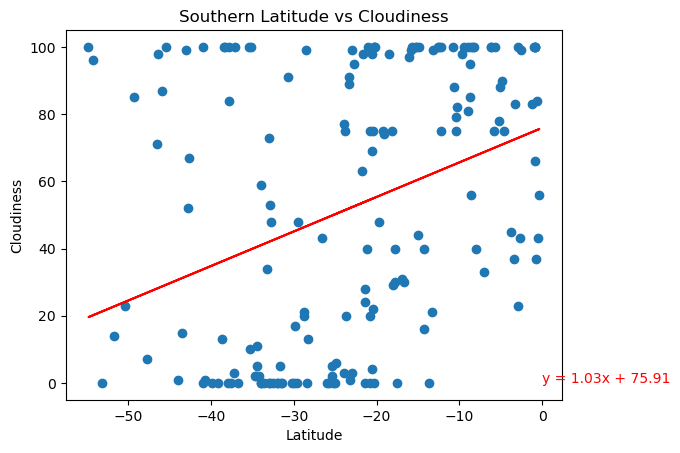

In [47]:
# Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Southern Latitude vs Cloudiness")

**Discussion about the linear relationship:** In the northern Hemisphere, there is a weak positive correlation between Latitude and cloudiness. This means that as latitude increases, cloudiness will increase by a small margin. In the southern hemisphere, there is a stronger positive correlation between Latitude and cloudiness, but it's still not a large factor to consider. This means that as latitude increases, cloudiness will also increase, but at a lower rate.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0003889375707332938


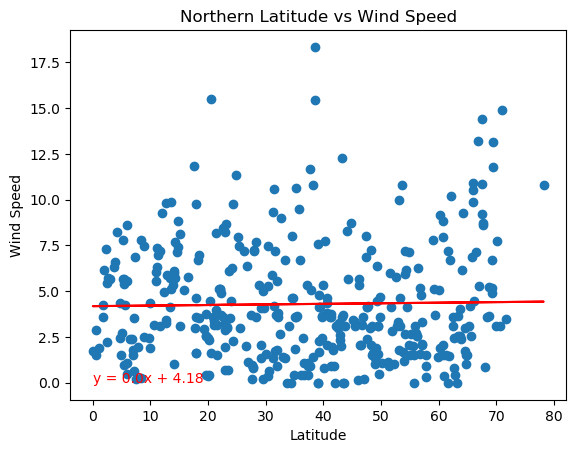

In [49]:
# Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Northern Latitude vs Wind Speed")

The r-squared is: 0.05743939852342923


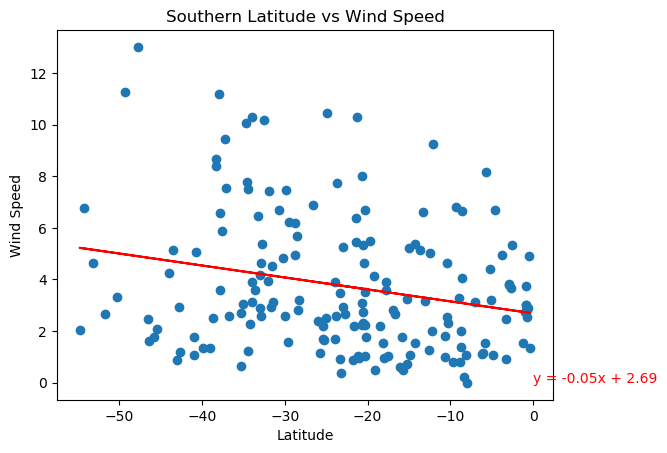

In [48]:
# Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Southern Latitude vs Wind Speed")

**Discussion about the linear relationship:** In the northern Hemisphere, there is a weak correlation between Latitude and wind speed, to the point where it's almost non-existent. This means that as latitude increases, wind speed will most likely not be affected or by a very small margin. In the southern hemisphere, there is a weak negative correlation between Latitude and Wind Speed. This means that as latitude increases, wind speed will decrease at a very small rate.